In [2]:
import pandas as pd

df = pd.read_csv("data/neighborhood_school_enrollment.csv")

edu_scores = df.groupby("neighborhood")["enrolled_students"].sum().reset_index()
edu_scores.columns = ["neighborhood", "total_enrollment"]

edu_scores["score"] = (
    (edu_scores["total_enrollment"] - edu_scores["total_enrollment"].min()) /
    (edu_scores["total_enrollment"].max() - edu_scores["total_enrollment"].min())
)

edu_scores.to_csv("data/education_scores.csv", index=False)

edu_scores.sort_values("score", ascending=False).head(10)

,neighborhood,total_enrollment,score
14,Carrick,1276,1.000000
12,Brookline,1169,0.915415
6,Beechview,794,0.618972
67,Sheraden,694,0.539921
74,Squirrel Hill South,679,0.528063
41,Knoxville,616,0.478261
11,Brighton Heights,598,0.464032
38,Homewood North,589,0.456917
36,Hazelwood,575,0.445850
24,East Hills,569,0.441107


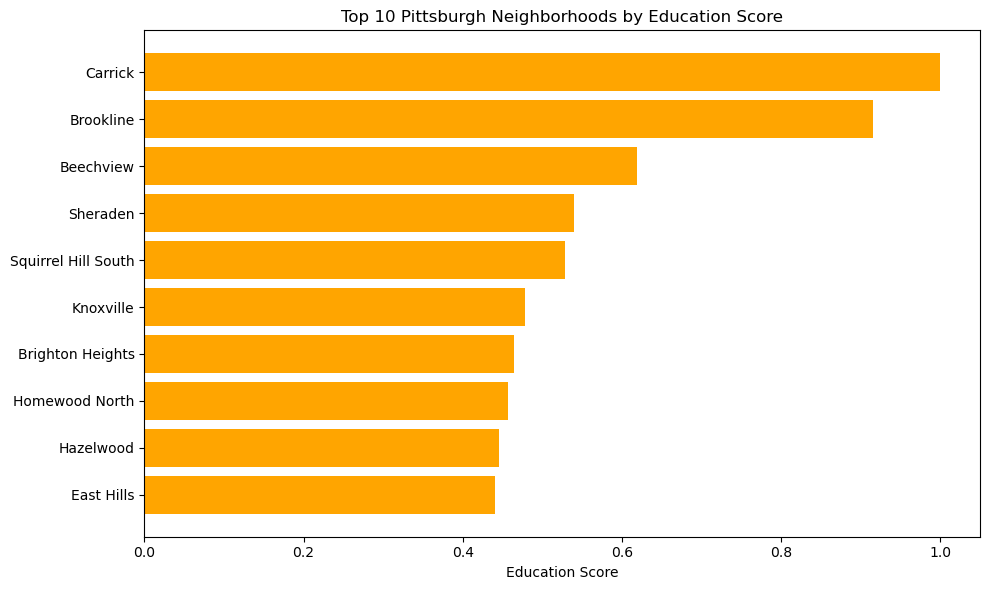

In [4]:
top10 = edu_scores.sort_values("score", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10["neighborhood"], top10["score"], color="orange")
plt.xlabel("Education Score")
plt.title("Top 10 Pittsburgh Neighborhoods by Education Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/top_education_neighborhoods.png")
plt.show()